In [7]:
import datetime
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# import pandas.io.data
import numpy as np
from matplotlib import pyplot as plt
import sys
# import sompylib.sompy as SOM

pd.__version__
%matplotlib inline
# import  pysparse
from pylab import matshow, savefig
from scipy.linalg import norm
import time
# from IPython.html.widgets import *
from ipywidgets import interact, HTML, FloatSlider
import time
import os


# What are Crawlers?

In [9]:
geo_locations = pd.read_csv('./data/1_AQI_geos.csv')

print (geo_locations.shape)

geo_locations.head()


(8841, 3)


,cityname,lat,lng
0,california/north-counties/santa-rosa/,NaN,NaN
1,california/north-counties/napa/,NaN,NaN
2,california/north-counties/san-rafael/,NaN,NaN
3,california/north-counties/sebastopol/,NaN,NaN
4,california/coast-and-central-bay/oakland/,NaN,NaN


In [10]:
# Drop locations without geocode
geo_locations = geo_locations.dropna()
print (geo_locations.shape)
geo_locations.head()


(8703, 3)


,cityname,lat,lng
12,losangeles/los-angeles-north-main-street/,-118.22676,34.06653
13,losangeles/north-long-beach-long-beach/,33.82376,-118.18916
14,losangeles/reseda/,34.19920,-118.53275
15,losangeles/burbank/,34.17599,-118.31701
16,losangeles/glendora-laurel/,-117.85038,34.14437


(-90, 90)

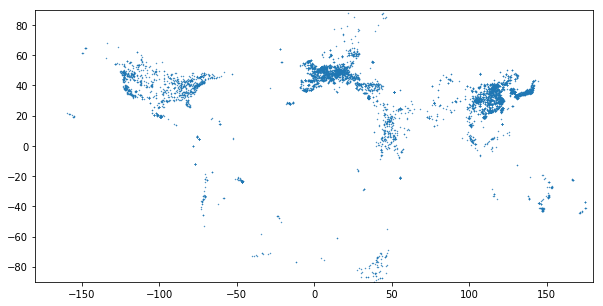

In [11]:
fig = plt.figure(figsize=(10,5))
plt.plot(geo_locations.lng,geo_locations.lat,'.',markersize=.8)

plt.xlim(-180,180)
plt.ylim(-90,90)


In [28]:
# Selections

(-90, 90)

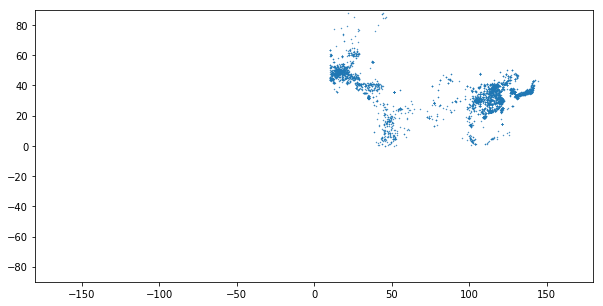

In [15]:
sel_locations = geo_locations.loc[(geo_locations['lng']>=10) & (geo_locations['lat']>=0) ]
fig = plt.figure(figsize=(10,5))
plt.plot(sel_locations.lng,sel_locations.lat,'.',markersize=.8)

plt.xlim(-180,180)
plt.ylim(-90,90)


In [20]:
geo_locations['cityname'].values[0].split('/')[0]

'losangeles'

In [24]:
#searching in strings
query = 'usa'

#this is an empty list
inds_query = []
for i in range(geo_locations.shape[0]):
    cityname = geo_locations['cityname'].values[i].split('/')[0]
    
    if  cityname == query:
#         print (cityname)
        inds_query.append(i)

(-90, 90)

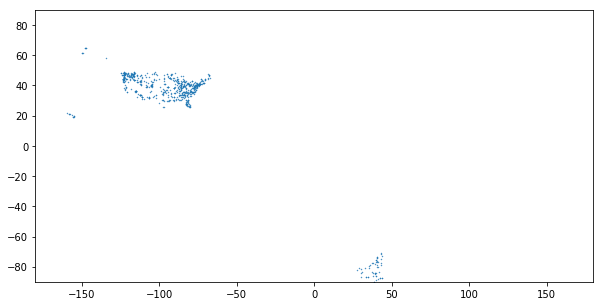

In [25]:
sel_locations = geo_locations.ix[inds_query]
fig = plt.figure(figsize=(10,5))
plt.plot(sel_locations.lng,sel_locations.lat,'.',markersize=.8)

plt.xlim(-180,180)
plt.ylim(-90,90)


In [26]:
import glob
import os
data_dir = "./data/measurements/"
measurement_filenames = []
counter = 1
for filename in glob.glob(os.path.join(data_dir, '*.csv')):
    
#     filename = filename.replace(path,'').replace('_','').replace('-','').replace('.png','').replace("'",'')
#     for dig in range(10):
#         filename = filename.replace(str(dig),'')
#     filename = filename.lower()
    measurement_filenames.append(filename)

print (len(measurement_filenames))

721


In [29]:
pollution_measurement = pd.read_csv(measurement_filenames[10])
print (measurement_filenames[10])
pollution_measurement.head()

./data/measurements/AQI_2017_6_9_8.csv


,cityname,min_o3,max_o3,min_pm25,max_pm25,min_pm10,max_pm10,min_so2,max_so2,min_no2,max_no2,min_co,max_co
0,california/north-counties/santa-rosa/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,california/north-counties/napa/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,california/north-counties/san-rafael/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,california/north-counties/sebastopol/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,california/coast-and-central-bay/oakland/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
pollution_measurement = pd.merge(pollution_measurement,geo_locations)
pollution_measurement.head()

,cityname,min_o3,max_o3,min_pm25,max_pm25,min_pm10,max_pm10,min_so2,max_so2,min_no2,max_no2,min_co,max_co,lat,lng
0,losangeles/los-angeles-north-main-street/,1.0,42.0,25.0,97.0,18,51.0,0.0,2.0,1.0,23.0,2.0,11.0,-118.22676,34.06653
1,losangeles/north-long-beach-long-beach/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.82376,-118.18916
2,losangeles/reseda/,10.0,53.0,28.0,75.0,10,43.0,1.0,2.0,2.0,12.0,0.0,0.0,34.19920,-118.53275
3,losangeles/burbank/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.17599,-118.31701
4,losangeles/glendora-laurel/,3.0,52.0,11.0,79.0,15,35.0,1.0,2.0,1.0,8.0,1.0,2.0,-117.85038,34.14437


In [31]:
pollution_measurement.columns

Index(['cityname', 'min_o3', 'max_o3', 'min_pm25', 'max_pm25', 'min_pm10',
       'max_pm10', 'min_so2', 'max_so2', 'min_no2', 'max_no2', 'min_co',
       'max_co', 'lat', 'lng'],
      dtype='object')

In [32]:
which_me = pollution_measurement.columns.values[:][1]
sel_locations = pollution_measurement[['cityname','lng','lat',which_me]].copy()
sel_locations = sel_locations.dropna()
print (sel_locations.shape)

(6434, 4)


In [33]:
pollution_measurement.describe(percentiles=[.001,.01,.02,.05,.95,.99,.999])

,min_o3,max_o3,min_pm25,max_pm25,max_pm10,min_so2,max_so2,min_no2,max_no2,min_co,max_co,lat,lng
count,6434.000000,6434.000000,6341.000000,6341.000000,6842.000000,5859.000000,5859.000000,6787.000000,6787.000000,4769.000000,4769.000000,8778.000000,8778.000000
mean,10.907056,57.029841,30.367765,109.616464,75.547062,2.856802,15.115549,4.370414,26.613379,3.435311,11.191654,37.052835,47.125371
std,12.829548,32.652617,30.302831,73.335041,109.596974,6.971322,21.057534,4.855027,18.205768,7.907157,18.767848,32.821444,77.608514
min,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-157.969126,-159.365000
0.1%,0.000000,0.000000,1.000000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-127.133477,-154.907868
1%,0.000000,0.000000,1.000000,15.400000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-93.233632,-122.741537
2%,0.000000,9.000000,1.000000,22.000000,10.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,-70.703837,-120.851198
5%,1.000000,17.000000,3.000000,33.000000,14.000000,0.000000,1.000000,1.000000,5.000000,0.000000,0.000000,-21.012700,-106.682849
50%,7.000000,48.000000,21.000000,95.000000,52.000000,2.000000,9.000000,3.000000,23.000000,3.000000,8.000000,37.282213,40.659200
95%,31.350000,116.000000,82.000000,188.000000,170.000000,7.000000,52.000000,12.000000,59.000000,8.000000,28.000000,106.930571,139.345477


([], <a list of 0 Text yticklabel objects>)

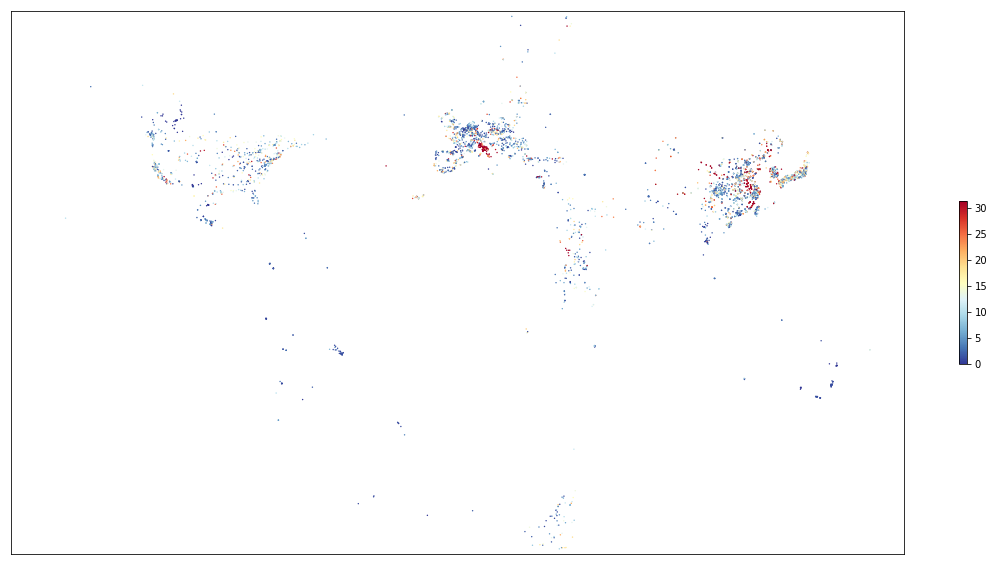

In [34]:
# make a copy first
fig = plt.figure(figsize=(20,10))
# plt.plot(sel_locations.lng,sel_locations.lat,'.',markersize=.8)
stat = sel_locations[which_me].describe(percentiles=[.001,.01,.02,.05,.95,.99,.999])
vals = sel_locations[which_me].values[:]
mnval = vals.min()
mxval = vals.max()
#     print (mnval,mxval)
mnval = stat.ix['1%']
mxval = stat.ix['95%']
plt.scatter(sel_locations.lng,sel_locations.lat,s=2,edgecolors='None',c=vals,vmin=mnval, vmax=mxval,cmap=plt.cm.RdYlBu_r);

plt.colorbar(shrink=.3)


plt.xlim(-180,180)
plt.ylim(-90,90)

plt.xticks([])
plt.yticks([])
# plt.axis('off')

# Can we make it better?

In [133]:
# let's add country borders to the plots
# https://github.com/johan/world.geo.json

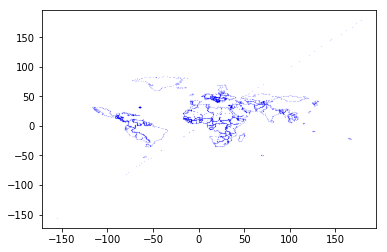

In [39]:
import numpy as np
import json
p = './data/world.geo.json-master/countries.geo.json'
with open(p) as json_data:
    d = json.load(json_data)
    json_data.close()
for country in d['features']:
    coords = country['geometry']['coordinates'][0]
    coords = np.asarray(coords)
    plt.plot(coords[:,0],coords[:,1],'.b',markersize=.1)

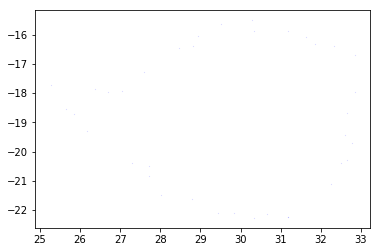

In [41]:
coords = country['geometry']['coordinates'][0]
coords = np.asarray(coords)
plt.plot(coords[:,0],coords[:,1],'.b',markersize=.1)

In [38]:
len(d['features'])

180

([], <a list of 0 Text yticklabel objects>)

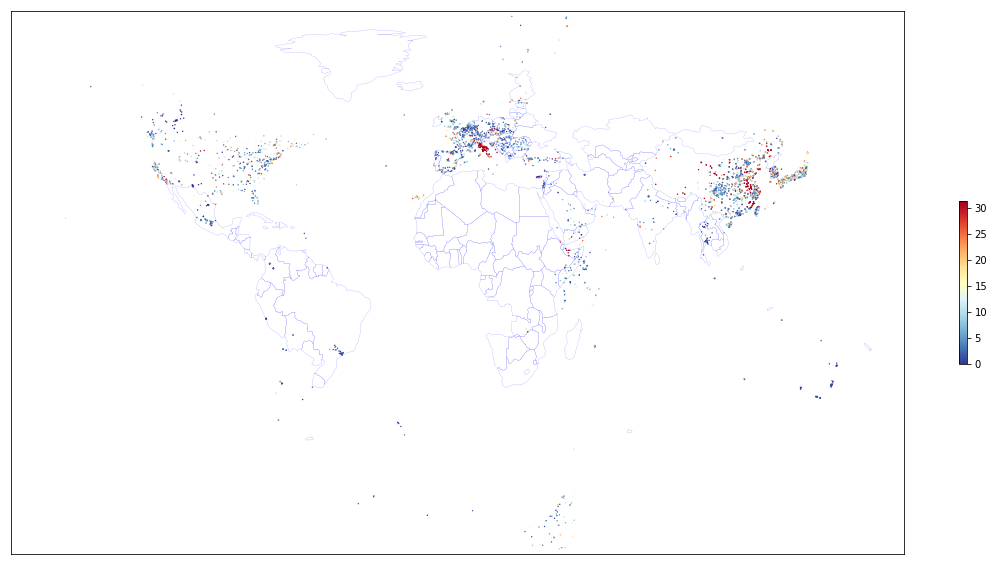

In [42]:
# make a copy first
fig = plt.figure(figsize=(20,10))
# plt.plot(sel_locations.lng,sel_locations.lat,'.',markersize=.8)
stat = sel_locations[which_me].describe(percentiles=[.001,.01,.02,.05,.95,.99,.999])
vals = sel_locations[which_me].values[:]
mnval = vals.min()
mxval = vals.max()
#     print (mnval,mxval)
mnval = stat.ix['1%']
mxval = stat.ix['95%']
plt.scatter(sel_locations.lng,sel_locations.lat,s=2,edgecolors='None',c=vals,vmin=mnval, vmax=mxval,cmap=plt.cm.RdYlBu_r);

plt.colorbar(shrink=.3)


for country in d['features']:
    coords = country['geometry']['coordinates'][0]
    coords = np.asarray(coords)
    plt.plot(coords[:,0],coords[:,1],'-b',markersize=.051,linewidth=.1)


plt.xlim(-180,180)
plt.ylim(-90,90)

plt.xticks([])
plt.yticks([])
# plt.axis('off')

# let's make it interactive

In [43]:
all_measures = ['min_o3', 'max_o3', 'min_pm25', 'max_pm25', 'min_pm10',
       'max_pm10', 'min_so2', 'max_so2', 'min_no2', 'max_no2', 'min_co',
       'max_co']

In [44]:
def interactive_pollution(which_measure='min_o3'):
    sel_locations = pollution_measurement[['cityname','lng','lat',which_measure]].copy()
    sel_locations = sel_locations.dropna()
    print (sel_locations.shape)
    
    
    
        # make a copy first
    fig = plt.figure(figsize=(20,10))
    # plt.plot(sel_locations.lng,sel_locations.lat,'.',markersize=.8)
    stat = sel_locations[which_measure].describe(percentiles=[.001,.01,.02,.05,.95,.99,.999])
    vals = sel_locations[which_measure].values[:]
    mnval = vals.min()
    mxval = vals.max()
    #     print (mnval,mxval)
    mnval = stat.ix['1%']
    mxval = stat.ix['95%']
    plt.scatter(sel_locations.lng,sel_locations.lat,s=2,edgecolors='None',c=vals,vmin=mnval, vmax=mxval,cmap=plt.cm.RdYlBu_r);

    plt.colorbar(shrink=.3)


    for country in d['features']:
        coords = country['geometry']['coordinates'][0]
        coords = np.asarray(coords)
        plt.plot(coords[:,0],coords[:,1],'-b',markersize=.051,linewidth=.1)


    plt.xlim(-180,180)
    plt.ylim(-90,90)

    plt.xticks([])
    plt.yticks([])
    # plt.axis('off')

(6434, 4)


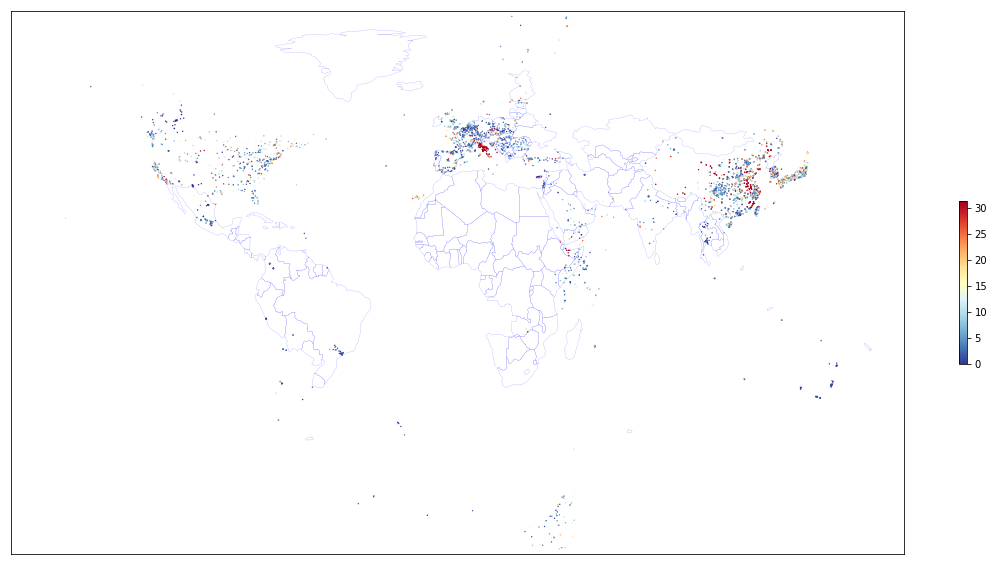

In [45]:
# now we call the function
interactive_pollution(which_measure='min_o3')

In [46]:
interact(interactive_pollution,which_measure= all_measures)

interactive(children=(Dropdown(description='which_measure', options=('min_o3', 'max_o3', 'min_pm25', 'max_pm25', 'min_pm10', 'max_pm10', 'min_so2', 'max_so2', 'min_no2', 'max_no2', 'min_co', 'max_co'), value='min_o3'), Output()), _dom_classes=('widget-interact',))

<function __main__.interactive_pollution>

In [ ]:
# Now adding date?

In [47]:
measurement_filenames[:10]

['./data/measurements/AQI_2017_3_31_20.csv',
 './data/measurements/AQI_2017_5_10_1.csv',
 './data/measurements/AQI_2017_4_10_1.csv',
 './data/measurements/AQI_2017_5_5_13.csv',
 './data/measurements/AQI_2017_6_20_3.csv',
 './data/measurements/AQI_2017_4_13_18.csv',
 './data/measurements/AQI_2017_3_21_19.csv',
 './data/measurements/AQI_2017_6_6_11.csv',
 './data/measurements/AQI_2017_5_10_16.csv',
 './data/measurements/AQI_2017_4_4_0.csv']

In [51]:

# dates_ = [x.replace('.csv','').split('_')[1:] for x in measurement_filenames]
# dates_ = [x.replace('.csv','').replace('./data/me/asurements/AQI_','').replace('_','.')+'.00' for x in measurement_filenames]
dates_ = [x.replace('.csv','').replace('./data/measurements/AQI_','').replace('_','.').split('.') for x in measurement_filenames]
# dates_ = [x.replace('.csv','').replace('./data/measurements/AQI_','').replace('_','.') for x in measurement_filenames]
dates_ = np.asarray(dates_).astype(int)

dates_DF = pd.DataFrame()
dates_DF['year'] = dates_[:,0]
dates_DF['month'] = dates_[:,1]
dates_DF['day'] = dates_[:,2]
dates_DF['hour'] = dates_[:,3]
dates_DF['dates'] = pd.to_datetime(dates_DF).values[:]


dates_DF['filename'] = measurement_filenames

dates_DF = dates_DF.sort_values('dates')

dates_DF.index = range(dates_DF.shape[0])

dates_DF.head()


,year,month,day,hour,dates,filename
0,2017,2,26,1,2017-02-26 01:00:00,./data/measurements/AQI_2017_2_26_1.csv
1,2017,2,26,11,2017-02-26 11:00:00,./data/measurements/AQI_2017_2_26_11.csv
2,2017,2,26,22,2017-02-26 22:00:00,./data/measurements/AQI_2017_2_26_22.csv
3,2017,2,27,8,2017-02-27 08:00:00,./data/measurements/AQI_2017_2_27_8.csv
4,2017,2,27,21,2017-02-27 21:00:00,./data/measurements/AQI_2017_2_27_21.csv


In [52]:
def interactive_pollution_time(which_measure='min_o3',time_slice=0):
    time_slice = int(time_slice)
    fn = dates_DF['filename'].ix[time_slice]
    
    try:
        pollution_measurement = pd.read_csv(str(fn))
        print (dates_DF['dates'][time_slice])
        pollution_measurement = pd.merge(pollution_measurement,geo_locations)

        sel_locations = pollution_measurement[['cityname','lng','lat',which_measure]].copy()
        sel_locations = sel_locations.dropna()
        print (sel_locations.shape)



            # make a copy first
        fig = plt.figure(figsize=(20,10))
        # plt.plot(sel_locations.lng,sel_locations.lat,'.',markersize=.8)
        stat = sel_locations[which_measure].describe(percentiles=[.001,.01,.02,.05,.95,.99,.999])
        vals = sel_locations[which_measure].values[:]
        mnval = vals.min()
        mxval = vals.max()
        #     print (mnval,mxval)
        mnval = stat.ix['1%']
        mxval = stat.ix['95%']
        plt.scatter(sel_locations.lng,sel_locations.lat,s=2,edgecolors='None',c=vals,vmin=mnval, vmax=mxval,cmap=plt.cm.RdYlBu_r);

        plt.colorbar(shrink=.3)


        for country in d['features']:
            coords = country['geometry']['coordinates'][0]
            coords = np.asarray(coords)
            plt.plot(coords[:,0],coords[:,1],'-b',markersize=.051,linewidth=.1)


        plt.xlim(-180,180)
        plt.ylim(-90,90)

        plt.xticks([])
        plt.yticks([])
        # plt.axis('off')
    except:
        print ('bad file: cannot read it')

In [53]:
interact(interactive_pollution_time,which_measure= all_measures,time_slice=(0,dates_DF.shape[0],1))

interactive(children=(Dropdown(description='which_measure', options=('min_o3', 'max_o3', 'min_pm25', 'max_pm25', 'min_pm10', 'max_pm10', 'min_so2', 'max_so2', 'min_no2', 'max_no2', 'min_co', 'max_co'), value='min_o3'), IntSlider(value=0, description='time_slice', max=721), Output()), _dom_classes=('widget-interact',))

<function __main__.interactive_pollution_time>

In [ ]:
# visualizing the time series for each location and each measure?

In [ ]:
# How to guess the missing values?

In [ ]:
# How to cluster them based on all the patterns?

In [ ]:
# What are the causes of these pollution levels? 

# Can we predict the air pollution of a specific location based on urban parameters?